# **AIT511: Course Project 1**

In [76]:
#imprts
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')
sns.set_style('whitegrid')
RANDOM_STATE = 73

In [77]:
#helper function
def submission(pred,name):

  submissionDf = pd.DataFrame({
      'id': dfTest['id'],
      'WeightCategory': pred
  })
  submissionDf.to_csv(name+'.csv', index=False)

In [78]:
#reading train test dataset
dfTrain = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")

# EDA

In [79]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [80]:
dfTrain.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,7766.000000,23.816308,1.699918,87.785225,2.442917,2.760425,2.027626,0.976968,0.613813
std,4484.135201,5.663167,0.087670,26.369144,0.530895,0.706463,0.607733,0.836841,0.602223
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3883.000000,20.000000,1.630927,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,7766.000000,22.771612,1.700000,84.000000,2.342220,3.000000,2.000000,1.000000,0.566353
75%,11649.000000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.582675,1.000000
max,15532.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [81]:
dfTrain.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [82]:
dfTrain.shape

(15533, 18)

### Initial Insights
**No Missing Values** : Both test and train are complete with no null values. No need to process null values

**Feature Types** : Mix of Categorical and Numerical Features

**Are the weight categories Balanced?**

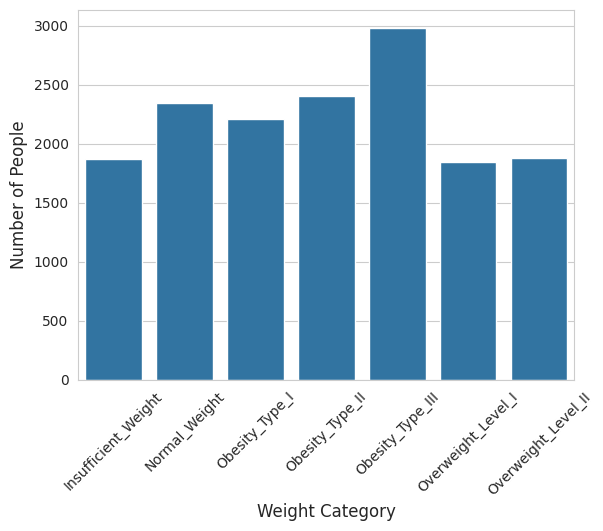

In [83]:
sns.countplot(x="WeightCategory",data=dfTrain,order=sorted(dfTrain['WeightCategory'].unique()))
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#data looks imbalanced

**Are people with a family history of being overweight more likely to fall into the higher weight categories?**

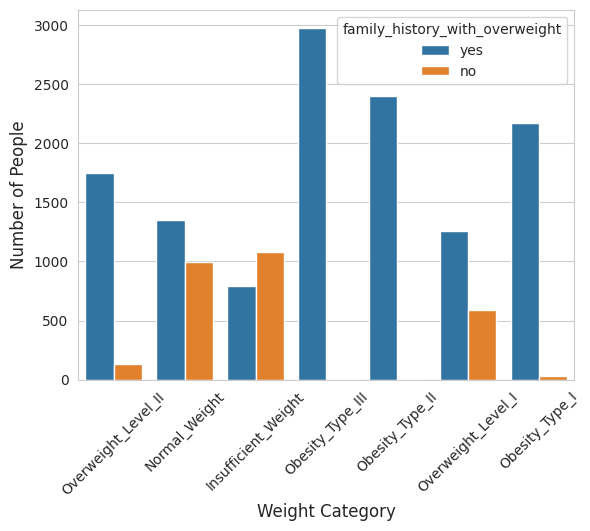

In [84]:
sns.countplot(x="WeightCategory",hue="family_history_with_overweight",data=dfTrain)
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#clearly shows that people with family history with overweight are more likely to be in higher weight category

### Insight 1
**Observation**  : Distribution is not prefectly balanced. Obesity type 2 and type 3 are most frequent while overweight level 1 is least fequent.

**Implication** : while Training we will need to stratify so that i model is trained on data with almost equal distribution

**How does age differ across the weight categories?**

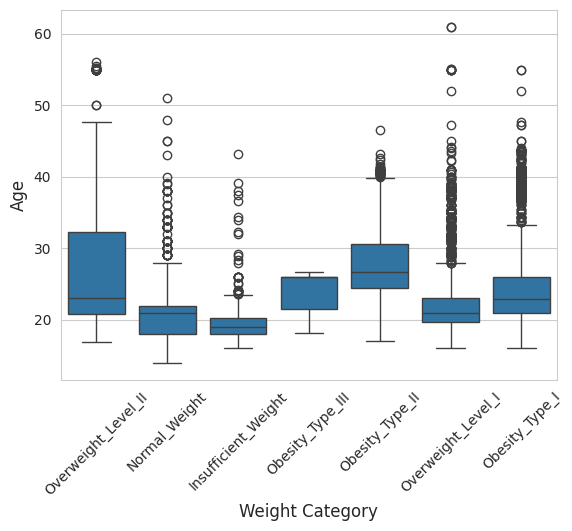

In [85]:
sns.boxplot(data=dfTrain,x="WeightCategory",y="Age" )
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**does weight correctly relate with weight Category**

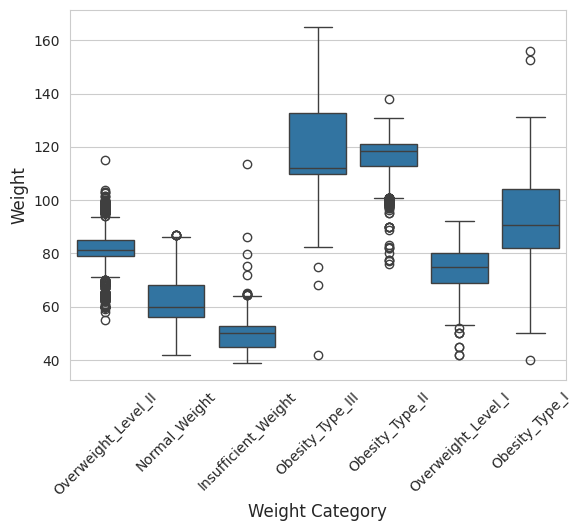

In [86]:
sns.boxplot(data=dfTrain,x="WeightCategory",y="Weight" )
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.xticks(rotation=45)
plt.show()
#almost clear staircase pattern
#weight is strong predictor for weight class

**Lets see if people who walk or use public transport have different outcomes than those who use automobiles.**

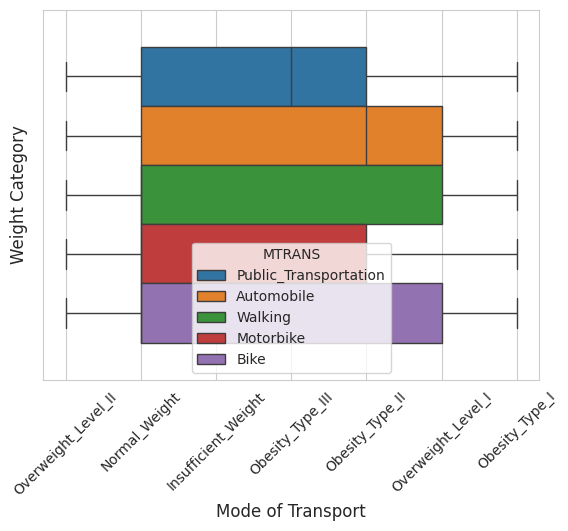

In [87]:
sns.boxplot(data=dfTrain,x="WeightCategory",hue="MTRANS" )
plt.ylabel('Weight Category', fontsize=12)
plt.xlabel('Mode of Transport', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insight 2
**Observation 1**  : Weight is an almost strong separator of weight categories most of the weight categories have clear boundaries with a slight mix up and few outliers.

**Observation 2**  : Age is also shows a clear relationship with weight categories. Obesity generally showing up more often in older age groups.


**Implication** : Weight will be the most powerful predictor with age as signiicant contributor.

**Check for correaltion among numerical columns**

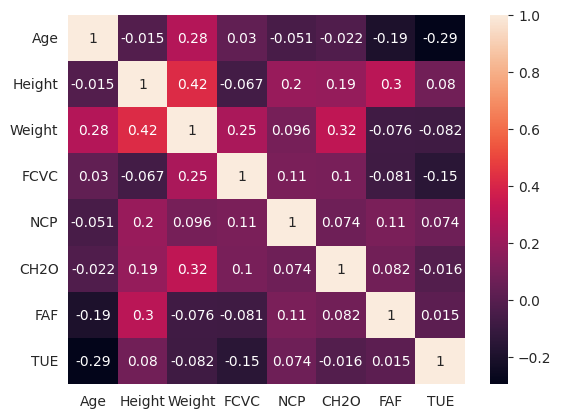

In [88]:
numericData = dfTrain.select_dtypes(include=['float64','int64']).drop("id",axis=1)

corrMat = numericData.corr()
sns.heatmap(corrMat,annot=True)
plt.show()

### Insight 3
**Observation 1** : Many numerical features have almost discrete values (FVCV,NCP,FAF,TUE,etc) instead of continous values. We can still treat them as continous values.

**Observation 2** : Height and Weight are the most corelated(0.42) according to the heatmap.

**Implication** : No Two features are highly corelated.
No multicolinearity

# **Univariate Analys**

**Trends in numerical columns**

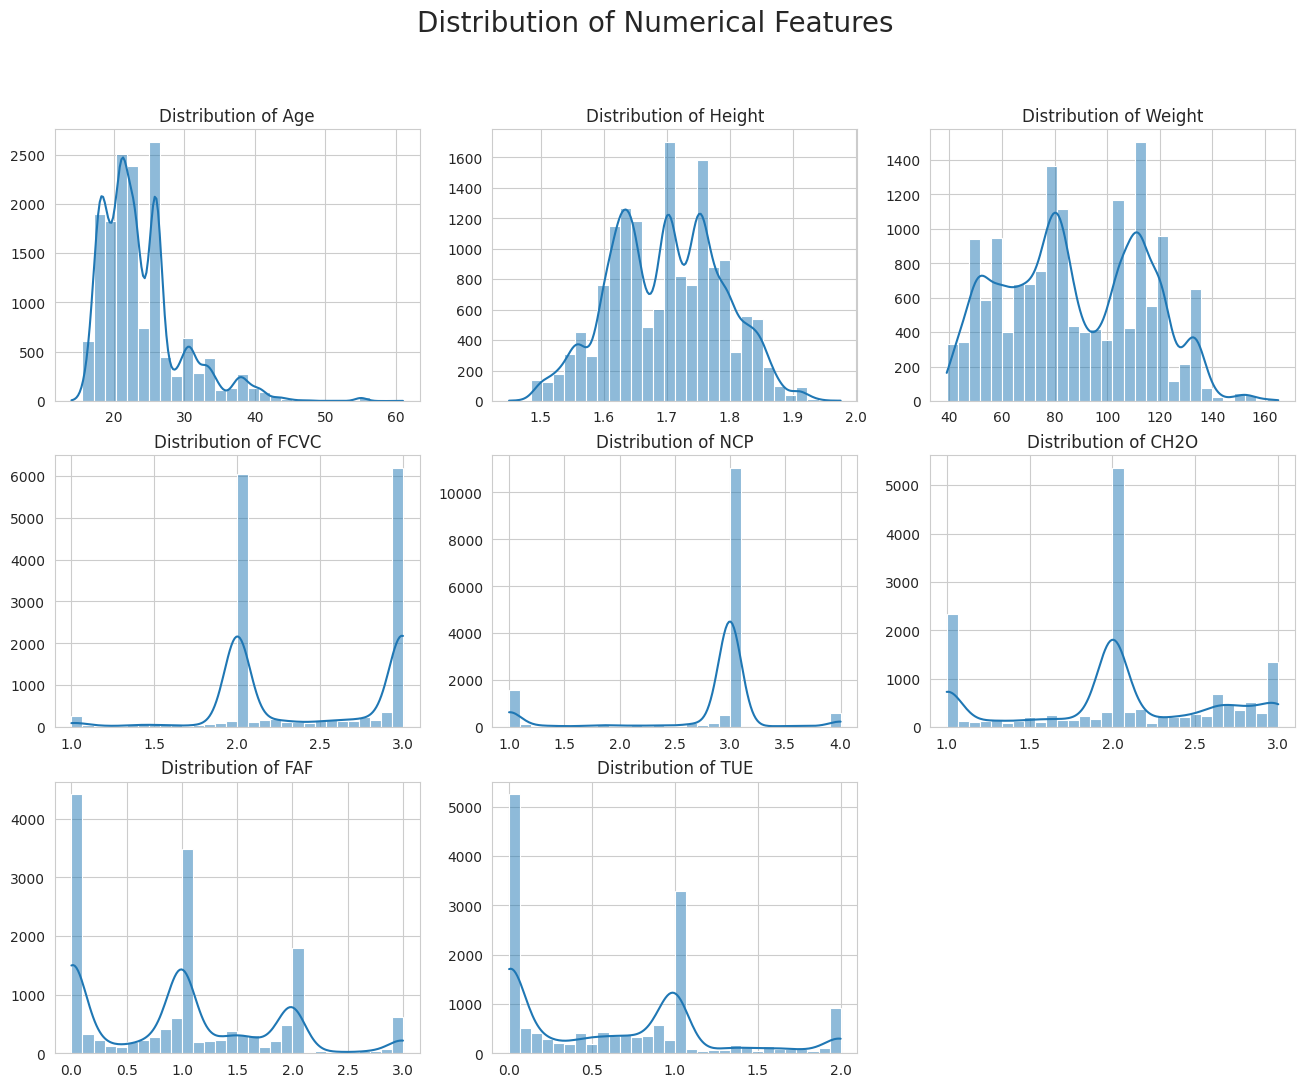

In [89]:
numColumns = numericData.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=20)

axes=axes.flatten()

for i, col in enumerate(numColumns):
    sns.histplot(numericData[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.show()

#height has normal distribution
# most of the data is skewed

**Trends in Categorical Features**

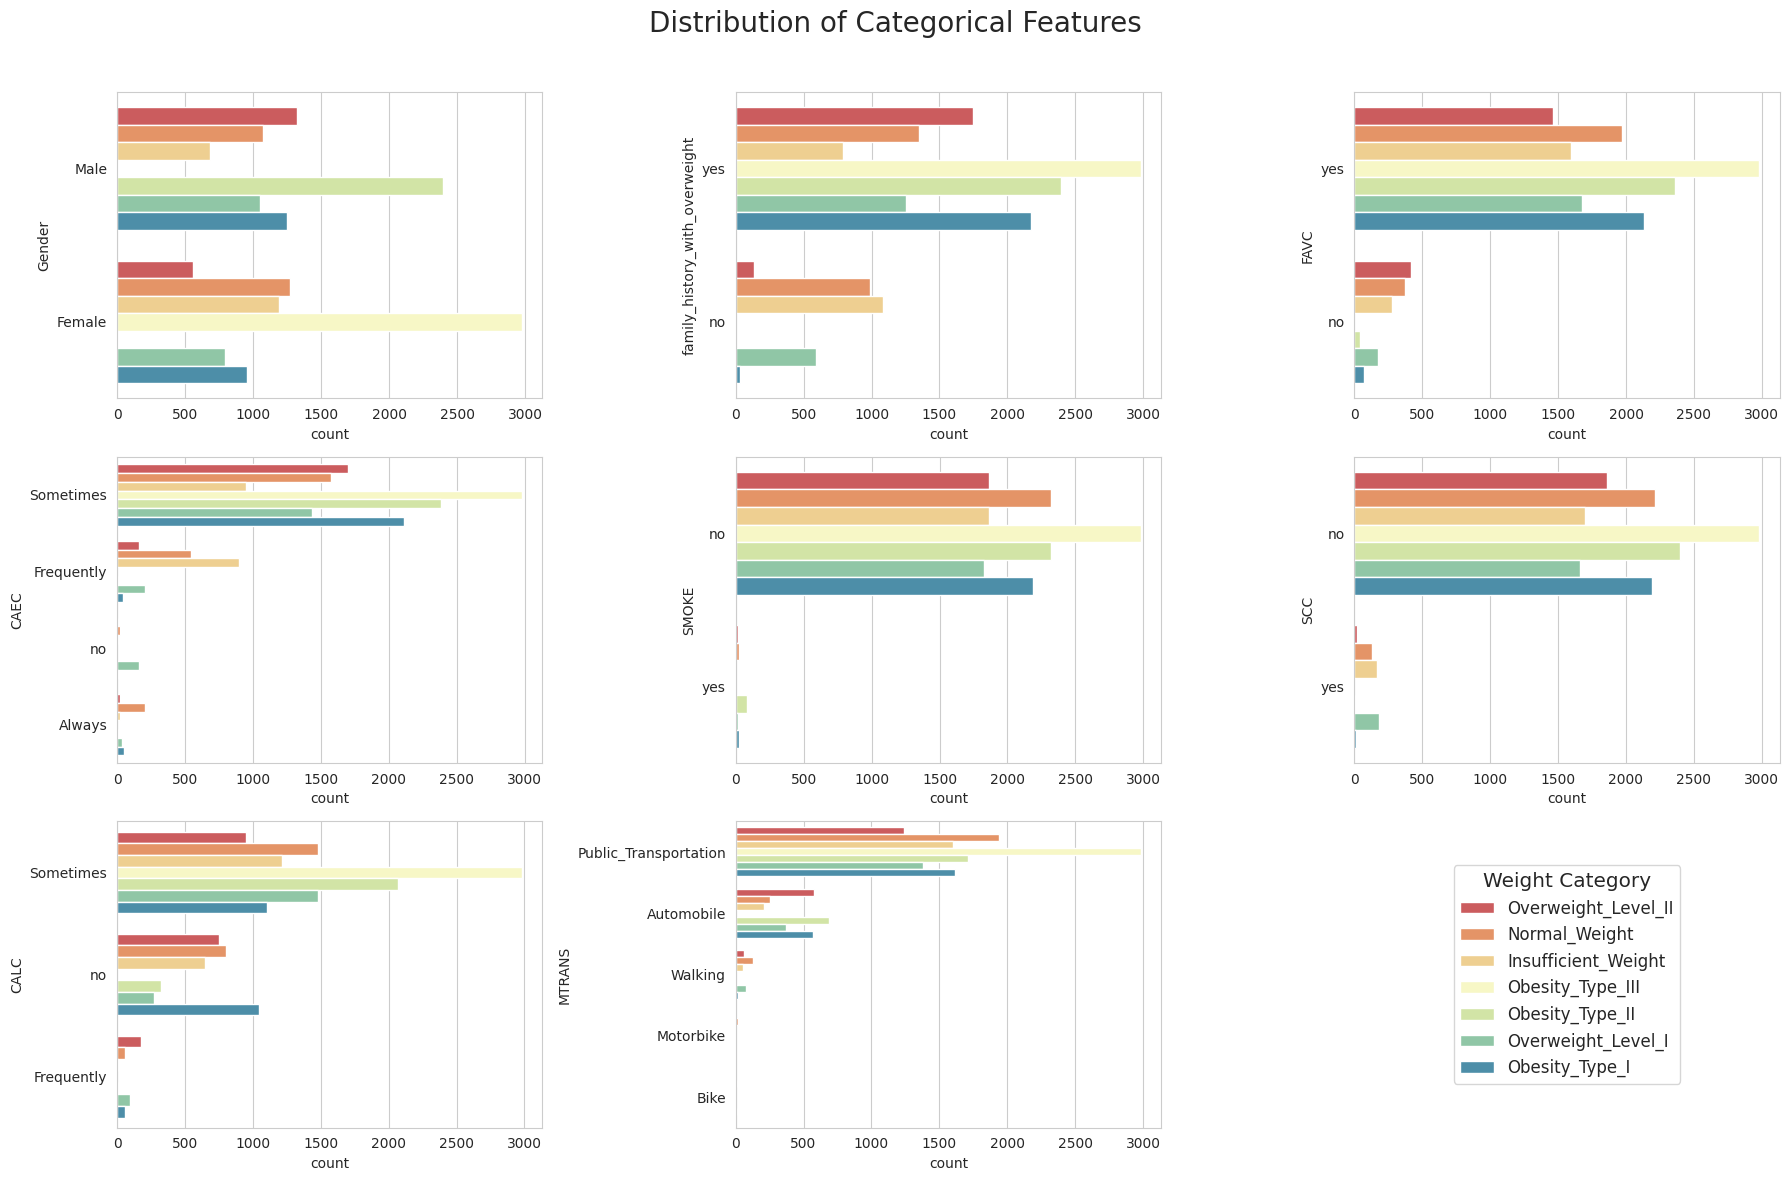

In [90]:
categoricalData = dfTrain.select_dtypes(include=['object']).drop("WeightCategory",axis=1)


catColumns = categoricalData.columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle('Distribution of Categorical Features', fontsize=20)
axes = axes.flatten()
handles=None
labels=None
for i,col in enumerate(catColumns):

  sns.countplot(data=dfTrain,y=col,ax=axes[i],hue="WeightCategory",palette="Spectral")
  if i == 0:
        handles, labels = axes[i].get_legend_handles_labels()
  if axes[i].get_legend():
        axes[i].get_legend().remove()
axes[8].axis('off')
axes[8].legend(handles, labels, title='Weight Category', loc='center',fontsize="large",title_fontsize="x-large")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#height has normal distribution
# most of the data is skewed

### Insight 4
**Observation 1** : Family history with overweight is a strong indicator.Almost all people without overweight family history are in lower weight category insufficeint weight or normal weight

**Observation 2** : Transport medium shows a clear pattern. Walking is assocaited with healthier weights. Public Transport users are more or less evenly distributed. Automobile people are more associate with overweight categories.

**Observation 3** : FAVC is less predictive as for majority it is yes and distribution is spread out.

**Implication** : Categorical Features are important. One hot encoding is needed as there is no ordedr for these features are equal
(Example: Walking is not greater or better than Automobile).

# Pre Processing

In [91]:
#imports

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [92]:
#dropping id
dfProcessed = dfTrain.drop("id",axis=1)
testProcess = dfTest.drop("id",axis=1)


### Categorical Encoding

In [93]:
#categorical data encoding to index

caecOrder = ['no', 'Sometimes', 'Frequently', 'Always']
calcOrder = ['no', 'Sometimes', 'Frequently', 'Always']

# Applying the mapping
dfProcessed['CAEC'] = dfProcessed['CAEC'].apply(lambda x: caecOrder.index(x))
dfProcessed['CALC'] = dfProcessed['CALC'].apply(lambda x: calcOrder.index(x))
testProcess['CAEC'] = testProcess['CAEC'].apply(lambda x: caecOrder.index(x))
testProcess['CALC'] = testProcess['CALC'].apply(lambda x: calcOrder.index(x))


In [94]:
dfProcessed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,1,no,2.763573,no,0.000000,0.976473,1,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,2,no,2.000000,no,1.000000,1.000000,0,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,1,no,1.910378,no,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,1,no,1.674061,no,1.467863,0.780199,1,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,1,no,1.979848,no,1.967973,0.931721,1,Public_Transportation,Overweight_Level_II


In [95]:
#one hot encoding
nominalFeatures = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

# Apply one-hot encoding. drop_first=True helps prevent multicollinearity.
dfProcessed = pd.get_dummies(dfProcessed, columns=nominalFeatures, drop_first=True)
testProcess = pd.get_dummies(testProcess, columns=nominalFeatures, drop_first=True)


### Scaling Numerical Data

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numericColumns = ['Age', 'Weight','Height' , 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaledTrain = dfProcessed.copy()
scaledTest = testProcess.copy()
scaledTrain[numericColumns] = scaler.fit_transform(dfProcessed[numericColumns])
scaledTest[numericColumns] = scaler.fit_transform(testProcess[numericColumns])

In [97]:
scaledTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 15533 non-null  float64
 1   Height                              15533 non-null  float64
 2   Weight                              15533 non-null  float64
 3   FCVC                                15533 non-null  float64
 4   NCP                                 15533 non-null  float64
 5   CAEC                                15533 non-null  int64  
 6   CH2O                                15533 non-null  float64
 7   FAF                                 15533 non-null  float64
 8   TUE                                 15533 non-null  float64
 9   CALC                                15533 non-null  int64  
 10  WeightCategory                      15533 non-null  object 
 11  Gender_Male                         15533

In [98]:
scaledTrain.describe()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
count,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,1.553300e+04,15533.000000,1.553300e+04,1.553300e+04,1.553300e+04,15533.000000
mean,-5.260569e-17,-1.487597e-15,2.689752e-16,4.304518e-16,-4.116967e-17,1.151098,-5.260569e-18,-6.953100e-17,-7.547773e-18,0.778922
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,0.446058,1.000032e+00,1.000032e+00,1.000032e+00,0.473942
min,-1.733416e+00,-2.850760e+00,-1.850147e+00,-2.717984e+00,-2.491966e+00,0.000000,-1.690972e+00,-1.167485e+00,-1.019279e+00,0.000000
25%,-6.739040e-01,-7.869668e-01,-8.261901e-01,-8.343106e-01,3.391301e-01,1.000000,-3.807209e-01,-1.159060e+00,-1.019279e+00,1.000000
50%,-1.844780e-01,9.332655e-04,-1.435521e-01,-1.896799e-01,3.391301e-01,1.000000,-4.545908e-02,2.752380e-02,-7.881107e-02,1.000000
75%,3.856079e-01,7.186589e-01,9.031804e-01,1.049363e+00,3.391301e-01,1.000000,8.290588e-01,7.238255e-01,6.412896e-01,1.000000
max,6.566094e+00,3.145359e+00,2.930491e+00,1.049363e+00,1.754678e+00,3.000000,1.600054e+00,2.417541e+00,2.301858e+00,2.000000


### Validation Split

In [99]:
XTrain = dfProcessed.drop("WeightCategory",axis=1)
yTrain = dfProcessed["WeightCategory"]
XScaled = scaledTrain.drop("WeightCategory",axis=1)

In [100]:
#Unscaled Data
unscaledTrainX,unscaledValX,unscaledTrainY,unscaledValY = train_test_split(XTrain,yTrain,test_size=0.2,random_state=RANDOM_STATE,stratify=yTrain)

In [101]:
#Scaled Data
scaledTrainX,scaledValX,scaledTrainY,scaledValY = train_test_split(XScaled,yTrain,test_size=0.2,random_state=RANDOM_STATE,stratify=yTrain)

# **Models**

In [102]:
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

### Decision Tree

In [103]:
treeModel = DecisionTreeClassifier(random_state=RANDOM_STATE,max_depth=12)


In [104]:
treeModel.fit(unscaledTrainX,unscaledTrainY)
yPred = treeModel.predict(unscaledValX)
print(classification_report(unscaledValY,yPred))


                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.90      0.90       374
      Normal_Weight       0.82      0.84      0.83       469
     Obesity_Type_I       0.87      0.80      0.83       441
    Obesity_Type_II       0.93      0.96      0.94       481
   Obesity_Type_III       1.00      0.99      0.99       597
 Overweight_Level_I       0.74      0.72      0.73       369
Overweight_Level_II       0.73      0.76      0.74       376

           accuracy                           0.86      3107
          macro avg       0.85      0.85      0.85      3107
       weighted avg       0.86      0.86      0.86      3107



In [105]:
treeModel.fit(scaledTrainX,scaledTrainY)
yPred = treeModel.predict(scaledValX)
print(classification_report(scaledValY,yPred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.90      0.90       374
      Normal_Weight       0.82      0.84      0.83       469
     Obesity_Type_I       0.87      0.80      0.83       441
    Obesity_Type_II       0.93      0.96      0.94       481
   Obesity_Type_III       1.00      0.99      0.99       597
 Overweight_Level_I       0.74      0.72      0.73       369
Overweight_Level_II       0.73      0.76      0.74       376

           accuracy                           0.86      3107
          macro avg       0.85      0.85      0.85      3107
       weighted avg       0.86      0.86      0.86      3107



### Random Forest

In [106]:
rfModel = RandomForestClassifier(n_estimators=200,random_state=RANDOM_STATE,max_depth=6,min_samples_split=100,min_samples_leaf=20)

In [107]:
rfModel.fit(unscaledTrainX,unscaledTrainY)
yPred = rfModel.predict(unscaledValX)
print(classification_report(unscaledValY,yPred))


                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.90      0.89       374
      Normal_Weight       0.72      0.87      0.79       469
     Obesity_Type_I       0.80      0.83      0.81       441
    Obesity_Type_II       0.93      0.97      0.95       481
   Obesity_Type_III       1.00      0.99      1.00       597
 Overweight_Level_I       0.83      0.51      0.63       369
Overweight_Level_II       0.70      0.72      0.71       376

           accuracy                           0.85      3107
          macro avg       0.84      0.83      0.83      3107
       weighted avg       0.85      0.85      0.84      3107



In [108]:
rfModel.fit(scaledTrainX,scaledTrainY)
yPred = rfModel.predict(scaledValX)
print(classification_report(scaledValY,yPred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.90      0.89       374
      Normal_Weight       0.72      0.87      0.79       469
     Obesity_Type_I       0.80      0.83      0.81       441
    Obesity_Type_II       0.93      0.97      0.95       481
   Obesity_Type_III       1.00      0.99      1.00       597
 Overweight_Level_I       0.83      0.51      0.63       369
Overweight_Level_II       0.70      0.72      0.71       376

           accuracy                           0.85      3107
          macro avg       0.84      0.83      0.83      3107
       weighted avg       0.85      0.85      0.84      3107



### Ada Boost

In [109]:
adaBoost = AdaBoostClassifier(n_estimators=400,random_state=RANDOM_STATE,learning_rate=0.2)

In [110]:
adaBoost.fit(unscaledTrainX,unscaledTrainY)
yPred = adaBoost.predict(unscaledValX)
print(classification_report(unscaledValY,yPred))


                     precision    recall  f1-score   support

Insufficient_Weight       0.71      0.77      0.74       374
      Normal_Weight       0.57      0.66      0.61       469
     Obesity_Type_I       0.49      0.75      0.59       441
    Obesity_Type_II       0.86      0.91      0.88       481
   Obesity_Type_III       0.96      0.99      0.98       597
 Overweight_Level_I       0.66      0.32      0.43       369
Overweight_Level_II       0.55      0.25      0.34       376

           accuracy                           0.70      3107
          macro avg       0.68      0.66      0.65      3107
       weighted avg       0.70      0.70      0.68      3107



In [111]:
treeModel.fit(scaledTrainX,scaledTrainY)
yPred = treeModel.predict(scaledValX)
print(classification_report(scaledValY,yPred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.90      0.90       374
      Normal_Weight       0.82      0.84      0.83       469
     Obesity_Type_I       0.87      0.80      0.83       441
    Obesity_Type_II       0.93      0.96      0.94       481
   Obesity_Type_III       1.00      0.99      0.99       597
 Overweight_Level_I       0.74      0.72      0.73       369
Overweight_Level_II       0.73      0.76      0.74       376

           accuracy                           0.86      3107
          macro avg       0.85      0.85      0.85      3107
       weighted avg       0.86      0.86      0.86      3107



### Gradient Boosting

In [112]:
gradBoost = GradientBoostingClassifier(n_estimators=700,
                                       random_state=RANDOM_STATE,
                                       learning_rate=0.02,
                                       max_depth=5,
                                       subsample=0.7,
                                       max_features='sqrt',
                                       min_samples_leaf=50,
                                       min_samples_split=100,)

In [113]:
gradBoost.fit(unscaledTrainX,unscaledTrainY)
yPred = gradBoost.predict(unscaledValX)
print(classification_report(unscaledValY,yPred))


                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.92      0.93       374
      Normal_Weight       0.87      0.89      0.88       469
     Obesity_Type_I       0.91      0.88      0.90       441
    Obesity_Type_II       0.96      0.97      0.97       481
   Obesity_Type_III       1.00      0.99      1.00       597
 Overweight_Level_I       0.80      0.79      0.80       369
Overweight_Level_II       0.80      0.82      0.81       376

           accuracy                           0.91      3107
          macro avg       0.90      0.90      0.90      3107
       weighted avg       0.91      0.91      0.91      3107



In [ ]:
gradBoost.fit(scaledTrainX,scaledTrainY)
yPred = gradBoost.predict(scaledValX)
print(classification_report(scaledValY,yPred))

### XG Boost

In [ ]:
#encoded Y
encoder = LabelEncoder()
enTrainY = encoder.fit_transform(unscaledTrainY)
enValY = encoder.fit_transform(unscaledValY)
enY = encoder.fit_transform(yTrain)

In [ ]:
xgbModel = xgb.XGBClassifier(
                             objective="multi:softmax",
                             random_state=RANDOM_STATE,
                             n_estimators=1000,
                             learning_rate=0.018,
                             max_depth=6,
                             subsample=0.7,
                             colsample_bytree=0.6,
                             gamma=0.1,
                             num_class=7
                             )

In [ ]:
xgbModel.fit(
    unscaledTrainX,
    enTrainY
    )
xgbPred = xgbModel.predict(unscaledValX)
print(classification_report(enValY,xgbPred))

# **Final Model**

In [ ]:
encoder = LabelEncoder()
xgbTrain = yTrain
xgbTrain = encoder.fit_transform(xgbTrain)


In [ ]:

xgbModel = xgb.XGBClassifier(
                             objective="multi:softmax",
                             random_state=69,
                             n_estimators=1000,
                             learning_rate=0.018,
                             max_depth=6,
                             subsample=0.7,
                             colsample_bytree=0.6,
                             gamma=0.1,
                             num_class=7
                             )


In [ ]:
xgbModel.fit(
    XTrain,
    xgbTrain
    )
xgbPred = xgbModel.predict(XTrain)
print(classification_report(xgbTrain,xgbPred))

In [ ]:
xgbPredTest = xgbModel.predict(testProcess)
xgbPredTest = encoder.inverse_transform(xgbPredTest)
submission(xgbPredTest,"xgSub1")
#0.91349 accuracy score


In [ ]:
'''


param_grid = {
   'max_depth': [5,6],
    'learning_rate': [0.015, 0.02,],
    'n_estimators': [800, 1000],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.6, 0.7]   ,
    'gamma':[0.0,0.1]
}

xgb_base = xgb.XGBClassifier(objective="multi:softmax", random_state=RANDOM_STATE)

grid_search = GridSearchCV(estimator=xgb_base,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

print("Starting GridSearchCV... This may take a while.")
grid_search.fit(XTrain, xgbTrain)
print("GridSearchCV complete.")

print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_xgb_model = grid_search.best_estimator_

xgbPredTest = best_xgb_model.predict(testProcess)
xgbPredTest = encoder.inverse_transform(xgbPredTest)
submission(xgbPredTest,"xgSub1")

# Starting GridSearchCV... This may take a while.
# Fitting 3 folds for each of 64 candidates, totalling 192 fits
# GridSearchCV complete.

# Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 800, 'subsample': 0.7}
# Best cross-validation accuracy: 0.9085

'''

